## **Example 1: Play Tennis**

https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

# **Explanation:**

**Dataset Creation:** The dataset is created as a dictionary and then converted to a pandas DataFrame.

**Encoding Categorical Variables:** The categorical features (Outlook, Temperature, Humidity, Windy) are converted into numeric format using one-hot encoding. The target variable (PlayTennis) is mapped to 0 (No) and 1 (Yes).

**Splitting the Data:** The dataset is split into training and testing sets using train_test_split.

**Training the Model:** A Gaussian Naive Bayes classifier (GaussianNB) is initialized and trained on the training data.

**Making Predictions:** The model is used to predict outcomes on the test set.

**Evaluating the Model**: The model’s performance is evaluated using accuracy_score, confusion_matrix, and classification_report.

**Output:**

The output of this program includes:

**Accuracy:** The proportion of correctly classified instances.

**Confusion Matrix**: A matrix showing the counts of true positives, true negatives, false positives, and false negatives.

**Classification Report:** Precision, recall, and F1-score for each class.
This program provides a basic yet comprehensive overview of how to implement and evaluate a Naive Bayes classifier using the "Play Tennis" dataset.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the Play Tennis dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Hot', 'Mild', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical variables to numeric (one-hot encoding)
df_encoded = pd.get_dummies(df.drop('PlayTennis', axis=1))
df_encoded['PlayTennis'] = df['PlayTennis'].map({'No': 0, 'Yes': 1})

# Split data into features (X) and target (y)
X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Display predicted probabilities for the test data
y_prob = model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Print the predicted probabilities for test data
print("\nPredicted Probabilities for Test Data:")
for i, probs in enumerate(y_prob):
    print(f"Instance {i+1}: No: {probs[0]:.4f}, Yes: {probs[1]:.4f}")

# Define a new instance using original categorical variables
new_instance = {
    'Outlook': ['Rain'],
    'Temperature': ['Cool'],
    'Humidity': ['High'],
    'Windy': [True]
}

# Convert the new instance to match the one-hot encoded training data
new_instance_df = pd.DataFrame(new_instance)
new_instance_encoded = pd.get_dummies(new_instance_df)

# Ensure the new instance has the same columns as the training data
new_instance_encoded = new_instance_encoded.reindex(columns=X.columns, fill_value=0)

# Predict the probability of the new instance
new_prob = model.predict_proba(new_instance_encoded)

# Predict the class label for the new instance
new_pred = model.predict(new_instance_encoded)

# Print the predicted probabilities for the new instance
print("\nPredicted Probabilities for New Instance:")
print(f"No: {new_prob[0][0]:.4f}, Yes: {new_prob[0][1]:.4f}")

# Print the final prediction for the new instance
final_prediction = "Yes" if new_pred[0] == 1 else "No"
print(f"\nFinal Prediction for New Instance: Play Tennis? {final_prediction}")


Accuracy: 0.8

Confusion Matrix:
 [[1 1]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5


Predicted Probabilities for Test Data:
Instance 1: No: 0.0000, Yes: 1.0000
Instance 2: No: 0.0000, Yes: 1.0000
Instance 3: No: 1.0000, Yes: 0.0000
Instance 4: No: 0.0000, Yes: 1.0000
Instance 5: No: 0.0000, Yes: 1.0000

Predicted Probabilities for New Instance:
No: 0.0000, Yes: 1.0000

Final Prediction for New Instance: Play Tennis? Yes


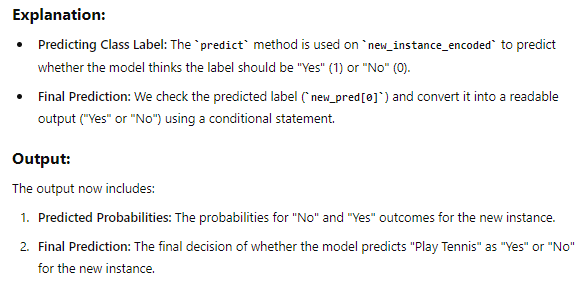

# **Example 2::: For IRIS data set**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_prob = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

print("\nPredicted Probabilities for Test Data:")
for i, probs in enumerate(y_prob):
    print(f"Instance {i+1}: Setosa: {probs[0]:.4f}, Versicolor: {probs[1]:.4f}, Virginica: {probs[2]:.4f}")

new_instance = {
    'sepal length (cm)': [5.5],
    'sepal width (cm)': [2.6],
    'petal length (cm)': [4.4],
    'petal width (cm)': [1.2]
}

new_instance_df = pd.DataFrame(new_instance)

new_prob = model.predict_proba(new_instance_df)

new_pred = model.predict(new_instance_df)

print("\nPredicted Probabilities for New Instance:")
print(f"Setosa: {new_prob[0][0]:.4f}, Versicolor: {new_prob[0][1]:.4f}, Virginica: {new_prob[0][2]:.4f}")

final_prediction = iris.target_names[new_pred[0]]
print(f"\nFinal Prediction for New Instance: {final_prediction}")

Accuracy: 0.9777777777777777

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Predicted Probabilities for Test Data:
Instance 1: Setosa: 0.0000, Versicolor: 0.9955, Virginica: 0.0045
Instance 2: Setosa: 1.0000, Versicolor: 0.0000, Virginica: 0.0000
Instance 3: Setosa: 0.0000, Versicolor: 0.0000, Virginica: 1.0000
Instance 4: Setosa: 0.0000, Versicolor: 0.9749, Virginica: 0.0251
Instance 5: Setosa: 0.0000, Versicolor: 0.8319, Virginica: 0.1681
Instance 6: Setosa: 1.0000, Versicolor: 0.0000, Virginica: 0.0000
Instance 7: Setosa: 0.0000, Versicolor: 1.0000, Virginica: 0.0000
Instan

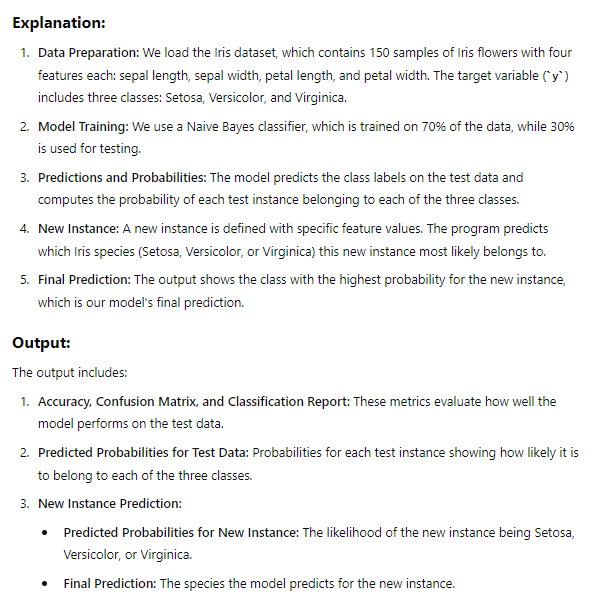